In [1]:
import osmnxelevate as oe

Users can download the Digital Elevation Model (DEM) for Midland City to run this code in the notebook <a href="https://uwmadison.box.com/s/jyvnoqoj48oqtaawz8b4mxuq4rffz5pa">link</a>

In [2]:
ndst = oe.NetworkDataset(place = "Midland, Midland County, TX, USA",
                        raster_fpath = r"C:\Users\Sidrcs\Documents\Github\Elevation_OSM\Midland_DEM",
                        output_fpath = r"C:\Users\Sidrcs\Documents\Github\Elevation_OSM")

Current working directory changed to C:\Users\Sidrcs\Documents\Github\Elevation_OSM


GeoPackage layer extract code from <a href="https://stackoverflow.com/questions/56165069/can-geopandas-get-a-geopackages-or-other-vector-file-all-layers">StackOverFlow</a>

In [3]:
%%time
ndst.bind_elevation_to_network()

Executing elevation binding process........
Saved edge network to file path C:\Users\Sidrcs\Documents\Github\Elevation_OSM\edge_network.gpkg
Saved edge network to file path C:\Users\Sidrcs\Documents\Github\Elevation_OSM\node_network.gpkg
CPU times: total: 48.5 s
Wall time: 49.4 s


Plot is saved as elevation.png


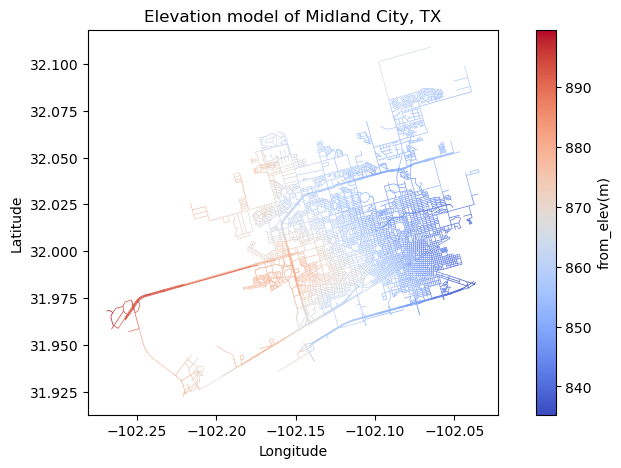

In [4]:
gpkg_fpath = "edge_network.gpkg"
col_name = "from_elev"
title = "Elevation model of Midland City, TX"
ndst.visualize_edges_elevation(gpkg_fpath, col_name, title)